Download the [dataset](https://www.kaggle.com/datasets/akram24/mall-customers?resource=download), load into a dataframe and display it using [head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('mall_customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


[Replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) 'Male' and 'Female' with 0 an 1 respectively, drop the CustomerID column, and [standarize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [3]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df = df.drop('CustomerID', axis=1)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_standardized.head())

      Genre       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980


Transoform the resulting data using its 3 top [principal components](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [4]:
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_standardized), columns=['PC1', 'PC2', 'PC3'])
print(df_pca.head())

        PC1       PC2       PC3
0 -0.406383 -0.520714 -2.072527
1 -1.427673 -0.367310 -2.277644
2  0.050761 -1.894068 -0.367375
3 -1.694513 -1.631908 -0.717467
4 -0.313108 -1.810483 -0.426460


Make a [3D scatterplot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) of the data transformed with the PCA

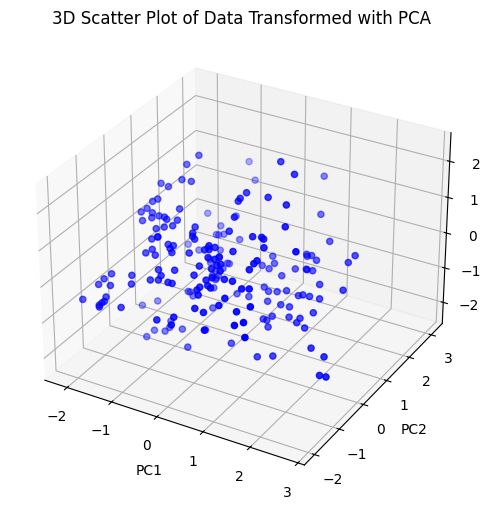

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='b', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of Data Transformed with PCA')
plt.show()

Make an [Elbow plot](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) for transformed data

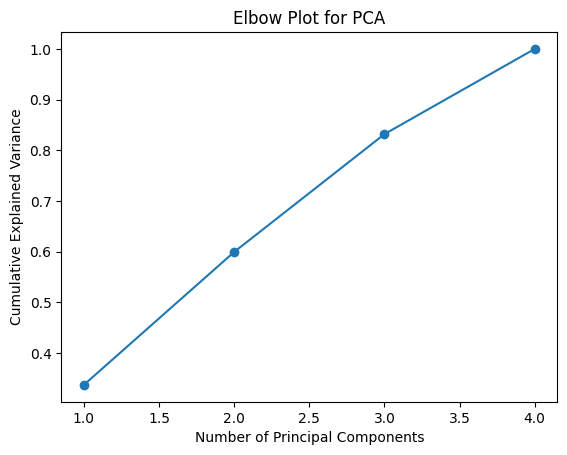

In [6]:
pca_full = PCA().fit(df_standardized)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.show()